Info Links: https://code.visualstudio.com/docs/python/jupyter-support

## Imports the excel files

In [9]:
import os
import pandas as pd

In [10]:
# Gets all the files from the dir
baseDir = r"C:\\Users\\robin\\Google Drive\\WORK\\ExcelsStuff\\files"
fileNames = []

In [11]:
for filename in os.listdir(baseDir):
    if(filename.startswith('~$')):
        continue
    fileNames.append(filename)
fileNames

['Dic312019.xlsx', 'Ene022020.xlsx']

In [12]:
# pd.read_excel(filePaths[0])

In [17]:
dfs = []
COLS = ["RAT","OPERATOR","IMSI","IMEI","TMSI","MS POWER","TA","HITS","DATE-TIME"]
for filename in fileNames:
    # dfs.append(pd.read_excel(f"{baseDir}\\{filename}"))
    temd_dfs = [pd.read_excel(f"{baseDir}\\{filename}", sheet_name=0, usecols=COLS), #2G
                pd.read_excel(f"{baseDir}\\{filename}", sheet_name=1, usecols=COLS), #3G
                pd.read_excel(f"{baseDir}\\{filename}", sheet_name=2, usecols=COLS)] #4G
    dfs.append(temd_dfs)
len(dfs)

2

In [18]:
dfs[0][0]

,RAT,OPERATOR,IMSI,IMEI,TMSI,MS POWER,TA,HITS,DATE-TIME
0,2G,EC-Claro(América Móvil)-01,740020170411491,359459077681588,FFFFFFFF,-61,0,1,mi. ene. 1 03:05:16 2020
1,2G,EC-Claro(América Móvil)-01,740010164127419,357815081319451,FFFFFFFF,-62,0,1,mi. ene. 1 03:04:51 2020
2,2G,EC-Claro(América Móvil)-01,740010177429066,863697045358438,151D1A53,-66,0,1,mi. ene. 1 02:55:06 2020
3,2G,EC-Claro(América Móvil)-01,740010120727910,357084081525001,97155956,-62,0,1,mi. ene. 1 02:54:44 2020
4,2G,EC-Claro(América Móvil)-01,740010180400328,358099104079272,FFFFFFFF,-64,0,1,mi. ene. 1 02:37:15 2020
5,2G,EC-Claro(América Móvil)-01,740010170185150,351628090419386,171EA43B,-63,0,1,mi. ene. 1 02:36:04 2020
6,2G,EC-Claro(América Móvil)-01,740010164214888,354262096042591,AE082241,-60,0,1,mi. ene. 1 02:23:45 2020
7,2G,EC-Claro(América Móvil)-01,740010171945358,13961007135195,190A62B1,-61,0,1,mi. ene. 1 02:19:02 2020
8,2G,EC-Claro(América Móvil)-01,740010174004009,357287081837371,B60B0041,-62,0,1,mi. ene. 1 02:15:32 2020
9,2G,EC-Claro(América Móvil)-01,740010110407756,11388001698642,FFFFFFFF,-61,0,1,mi. ene. 1 02:14:41 2020


In [19]:
# The dfs[0] means the excel file at index 0 with the 3 pages as dataframes
len(dfs[0])
# The fisrt index is a list of dataframes that has everydataframe

3

In [20]:
len([df for dflist in dfs for df in dflist])

6

In [21]:
allData = pd.concat([df for dflist in dfs for df in dflist])
allData.info() # 3633-6 filas sin contar los headers

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3627 entries, 0 to 73
Data columns (total 9 columns):
RAT          3627 non-null object
OPERATOR     3627 non-null object
IMSI         3524 non-null float64
IMEI         3528 non-null float64
TMSI         3528 non-null object
MS POWER     3627 non-null float64
TA           3627 non-null int64
HITS         3627 non-null int64
DATE-TIME    3627 non-null object
dtypes: float64(3), int64(2), object(4)
memory usage: 283.4+ KB


In [22]:
allData.head()
# allData.drop('MODEL', axis=1,inplace=True)


,RAT,OPERATOR,IMSI,IMEI,TMSI,MS POWER,TA,HITS,DATE-TIME
0,2G,EC-Claro(América Móvil)-01,7.400202e+14,3.594591e+14,FFFFFFFF,-61.0,0,1,mi. ene. 1 03:05:16 2020
1,2G,EC-Claro(América Móvil)-01,7.400102e+14,3.578151e+14,FFFFFFFF,-62.0,0,1,mi. ene. 1 03:04:51 2020
2,2G,EC-Claro(América Móvil)-01,7.400102e+14,8.636970e+14,151D1A53,-66.0,0,1,mi. ene. 1 02:55:06 2020
3,2G,EC-Claro(América Móvil)-01,7.400101e+14,3.570841e+14,97155956,-62.0,0,1,mi. ene. 1 02:54:44 2020
4,2G,EC-Claro(América Móvil)-01,7.400102e+14,3.580991e+14,FFFFFFFF,-64.0,0,1,mi. ene. 1 02:37:15 2020


In [23]:
allData.groupby('RAT').count()

,OPERATOR,IMSI,IMEI,TMSI,MS POWER,TA,HITS,DATE-TIME
RAT,,,,,,,,
2G,1457,1456,1457,1457,1457,1457,1457,1457
3G,2071,1969,2071,2071,2071,2071,2071,2071
4G,99,99,0,0,99,99,99,99


In [25]:
allData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3627 entries, 0 to 73
Data columns (total 9 columns):
RAT          3627 non-null object
OPERATOR     3627 non-null object
IMSI         3524 non-null float64
IMEI         3528 non-null float64
TMSI         3528 non-null object
MS POWER     3627 non-null float64
TA           3627 non-null int64
HITS         3627 non-null int64
DATE-TIME    3627 non-null object
dtypes: float64(3), int64(2), object(4)
memory usage: 283.4+ KB


In [26]:
allData.groupby('IMSI').count()

,RAT,OPERATOR,IMEI,TMSI,MS POWER,TA,HITS,DATE-TIME
IMSI,,,,,,,,
2.040433e+14,1,1,1,1,1,1,1,1
2.140318e+14,1,1,1,1,1,1,1,1
2.140338e+14,1,1,1,1,1,1,1,1
2.140742e+14,2,2,2,2,2,2,2,2
2.140743e+14,1,1,1,1,1,1,1,1
2.140743e+14,1,1,1,1,1,1,1,1
2.140743e+14,1,1,1,1,1,1,1,1
2.140743e+14,1,1,1,1,1,1,1,1
2.140743e+14,1,1,1,1,1,1,1,1


In [27]:
allData.groupby('IMSI').count()['IMEI']

IMSI
2.040433e+14    1
2.140318e+14    1
2.140338e+14    1
2.140742e+14    2
2.140743e+14    1
2.140743e+14    1
2.140743e+14    1
2.140743e+14    1
2.140743e+14    1
2.140743e+14    1
2.140743e+14    1
2.140743e+14    1
2.400800e+14    1
2.400800e+14    1
2.400800e+14    1
3.101201e+14    1
3.102602e+14    1
3.102602e+14    1
3.102602e+14    1
3.102606e+14    1
3.102609e+14    1
3.104102e+14    1
3.104108e+14    1
3.104108e+14    1
3.114805e+14    1
3.125300e+14    1
3.125302e+14    1
7.160608e+14    1
7.160608e+14    1
7.160609e+14    1
               ..
7.400202e+14    1
7.400202e+14    1
7.400202e+14    1
7.400202e+14    1
7.400202e+14    1
7.400202e+14    1
7.400202e+14    1
7.400202e+14    1
7.400202e+14    1
7.400202e+14    1
7.400202e+14    1
7.400202e+14    1
7.400202e+14    1
7.400202e+14    1
7.400202e+14    1
7.400202e+14    1
7.400202e+14    1
7.400202e+14    8
7.400202e+14    1
7.400202e+14    1
7.400202e+14    1
7.400202e+14    7
7.400202e+14    1
7.400202e+14    1
7.400

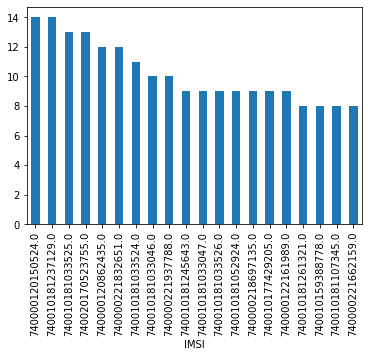

In [28]:
allData.groupby('IMSI').count()['IMEI'].sort_values(ascending=False).head(20).plot.bar()